In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [91]:
# use iris and get only petal width and sepal length
iris = load_iris()
sepal_length = iris.data[:, 0]
petal_width = iris.data[:, 3]
target = iris.target

species_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
species_name = [species_dict[i] for i in target]

In [118]:
class LinearRegression:
    def __init__(self):
        self.iterations = 500
        self.learning_rate = 0.001
        self.intercept = 0
        self.parameters = np.array([])
        self.X = np.array([])
        self.y = np.array([])
        self.length = 0
        self.loss_history = list()

    def _intercept(self):
        return self.intercept

    def _params(self):
        return self.parameters
    
    def _loss_history(self):
        return self.loss_history

    def mean_squared_error(self, y_predictions):
        return np.sum(np.square(self.y - y_predictions)) / len(self.y)

    def predict(self, X):
        """
            integer + n*m matrix * m*1 matrix = n*1 matrix
        """
        X = X.reshape(-1, 1) if len(X.shape) == 1 else X
        return self.intercept + np.dot(X, self.parameters[0].reshape(-1,1))

    def update_params(self, y_predictions):
        error = np.array(y_predictions - self.y)
        self.intercept -= self.learning_rate * np.sum(error) / self.length
        print("Initial parameters: ", self.parameters)
        for i in range(len(self.parameters[0])):
            # coefficient - alpha * np.sum((predictions - y) * x) / len(x)
            self.parameters[i] -= self.learning_rate * np.sum(error * self.X[:, i]) / self.length
        print("Updated parameters: ", self.parameters)

    def fit(self, X, y):
        self.X = np.array(X)
        self.X = self.X.reshape(-1, 1) if len(self.X.shape) == 1 else self.X
        self.y = np.array(y)
        self.length = len(self.y)
        self.parameters = np.zeros((1, self.X.shape[1]))

        for i in range(self.iterations):
            y_predictions = self.predict(self.X)
            self.update_params(y_predictions)
            self.loss_history.append(self.mean_squared_error(y_predictions))

In [119]:
lin_reg = LinearRegression()
lin_reg.fit(sepal_length, petal_width)

Initial parameters:  [[0.]]
Updated parameters:  [[1.12814]]
Initial parameters:  [[1.12814]]
Updated parameters:  [[-3.67937631]]
Initial parameters:  [[-3.67937631]]
Updated parameters:  [[16.86834161]]
Initial parameters:  [[16.86834161]]
Updated parameters:  [[-70.89342965]]
Initial parameters:  [[-70.89342965]]
Updated parameters:  [[304.00845831]]
Initial parameters:  [[304.00845831]]
Updated parameters:  [[-1297.44152462]]
Initial parameters:  [[-1297.44152462]]
Updated parameters:  [[5543.45454621]]
Initial parameters:  [[5543.45454621]]
Updated parameters:  [[-23678.66424448]]
Initial parameters:  [[-23678.66424448]]
Updated parameters:  [[101148.9363935]]
Initial parameters:  [[101148.9363935]]
Updated parameters:  [[-432074.82520709]]
Initial parameters:  [[-432074.82520709]]
Updated parameters:  [[1845687.35299183]]
Initial parameters:  [[1845687.35299183]]
Updated parameters:  [[-7884187.57310857]]
Initial parameters:  [[-7884187.57310857]]
Updated parameters:  [[33678740.

/var/folders/tb/18zmpr1n5g75rvhr7gcgx2600000gn/T/ipykernel_73097/162062026.py:22: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(self.y - y_predictions)) / len(self.y)
/var/folders/tb/18zmpr1n5g75rvhr7gcgx2600000gn/T/ipykernel_73097/162062026.py:37: RuntimeWarning: invalid value encountered in subtract
  self.parameters[i] -= self.learning_rate * np.sum(error * self.X[:, i]) / self.length


In [105]:
print(f"intercept: {lin_reg._intercept()}, params: {lin_reg._params()}")

intercept: 2.8687082503535088e+17, params: [[1.70878679e+18]]


In [106]:
print(f"loss history: {lin_reg._loss_history()}")

loss history: ['0. 302.33']


In [96]:
predictions = lin_reg.predict(sepal_length.reshape(-1,1))

In [97]:
predictions

array([[9.00168345e+18],
       [8.65992609e+18],
       [8.31816874e+18],
       [8.14729006e+18],
       [8.83080477e+18],
       [9.51431949e+18],
       [8.14729006e+18],
       [8.83080477e+18],
       [7.80553270e+18],
       [8.65992609e+18],
       [9.51431949e+18],
       [8.48904741e+18],
       [8.48904741e+18],
       [7.63465402e+18],
       [1.01978342e+19],
       [1.00269555e+19],
       [9.51431949e+18],
       [9.00168345e+18],
       [1.00269555e+19],
       [9.00168345e+18],
       [9.51431949e+18],
       [9.00168345e+18],
       [8.14729006e+18],
       [9.00168345e+18],
       [8.48904741e+18],
       [8.83080477e+18],
       [8.83080477e+18],
       [9.17256213e+18],
       [9.17256213e+18],
       [8.31816874e+18],
       [8.48904741e+18],
       [9.51431949e+18],
       [9.17256213e+18],
       [9.68519817e+18],
       [8.65992609e+18],
       [8.83080477e+18],
       [9.68519817e+18],
       [8.65992609e+18],
       [7.80553270e+18],
       [9.00168345e+18],


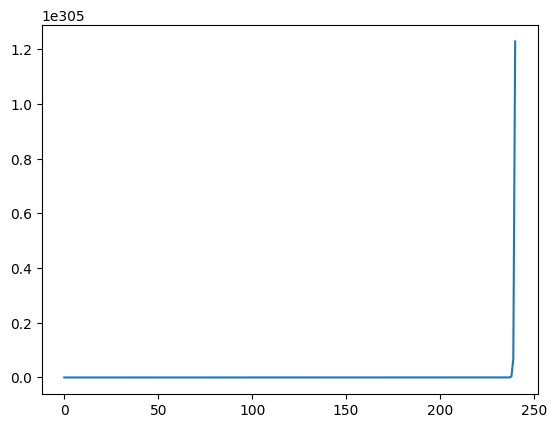

In [120]:
# plot lin_reg._cost_history()
plt.plot(lin_reg._loss_history())
plt.show()

In [62]:
# calculate the accuracy
accuracy = np.sum(np.round(predictions) == petal_width) / len(petal_width)
print(f'Accuracy: {accuracy}')

Accuracy: 0.0


In [ ]:
from dataclasses import dataclass, field
import numpy as np

@dataclass
class LinearRegression:
    iterations: int = 1_000_000
    learning_rate: float = 0.01
    tolerance: float = 0.001
    patience: int = 10
    parameters: np.ndarray = field(default_factory=lambda: np.array([]))
    X: np.ndarray = field(default_factory=lambda: np.array([]))
    y: np.ndarray = field(default_factory=lambda: np.array([]))
    loss_history: np.ndarray = field(default_factory=lambda: np.array([]))

    def _params(self):
        return self.parameters
    
    def _cost_history(self):
        return self.loss_history

    def mean_squared_error(self, y_predictions):
        return np.sum(np.square(self.y - y_predictions)) / len(self.y)

    def predict(self, X):
        return self.intercept + np.dot(X, self.parameters)

    def update_params(self, y_predictions):
        length = len(y_predictions)
        error = np.array(y_predictions - self.y)
        self.parameters[0] -= self.learning_rate * np.sum(error) / length
        self.parameters[1:] -= self.learning_rate * np.dot(error.T, self.X[:, 1:]) / length

    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
        best_loss = np.inf
        epochs_without_improvement = 0

        for _ in range(self.iterations):
            y_predictions = self.predict(X)
            self.update_params(y_predictions)
            current_loss = self.mean_squared_error(y_predictions)
            
            if best_loss - current_loss > self.tolerance:
                best_loss = current_loss
                epochs_without_improvement = 0
                self.loss_history = np.append(self.loss_history, self.mean_squared_error(y_predictions))
            else:
                epochs_without_improvement += 1

            if epochs_without_improvement >= self.patience:
                break